<a href="https://www.kaggle.com/code/mazenalasas/bank-churn-binary-classification" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bank Churn Binary Classification
## Introduction
### **Task:** Predict whether a customer continues with their account or closes it (e.g., churns).
### **The Dataset** (both train and test) was generated from a deep learning model trained on the [Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction) dataset. Feature distributions are close to, but not exactly the same, as the original.
#### The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. 
#### The dataset includes the following attributes:
- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

# 1. Setup 
### - import libraries and Ignore warnings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# 2. Data Loading and Exploration

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data  = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [3]:
train_data.shape

(165034, 14)

In [4]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
train_data.describe(exclude = np.number)

,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


In [8]:
train_data.drop(['id', 'CustomerId', 'Surname'], axis = 1, inplace = True)
train_data.duplicated().sum()

123

In [9]:
test_data.drop(['id', 'CustomerId', 'Surname'], axis = 1, inplace = True)

### Data Exploration Summary

#### Key Observations:
1. **Shape of the Dataset:**
   - The dataset contains **165,034 rows** and **14 columns**.

2. **Missing Values:**
   - No missing values were detected in the dataset. All features have complete data.

3. **Duplicate Rows:**
   - There are **123 duplicate rows** in the dataset.

4. **Feature Analysis:**
   - Categorical Features: `Geography`, `Gender`, and `Surname`.
   - Numerical Features: Include `CreditScore`, `Age`, `Balance`, `NumOfProducts`, etc.
   - Target: `Exited` (Binary classification problem).
<br>
<br>

In [10]:
theme_color = sns.color_palette('Paired')

## Exploratory Data Analysis (EDA)


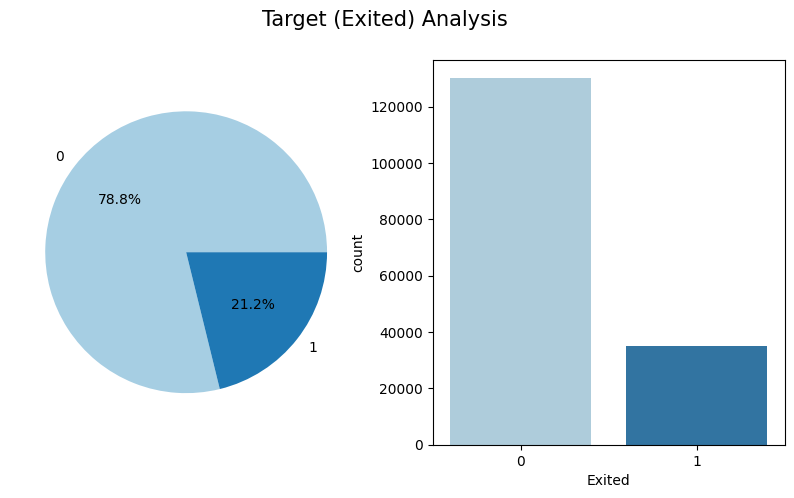

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

exited_count = train_data['Exited'].value_counts()
ax[0].pie(exited_count, labels = exited_count.index, autopct = '%1.1f%%', colors = theme_color)
sns.countplot(x = 'Exited', data = train_data, ax = ax[1], palette = theme_color)

plt.suptitle('Target (Exited) Analysis', fontsize = 15)
plt.show()

In [12]:
numerical_columns = []
categorical_columns = []

for col in train_data.columns:
    if train_data[col].dtype in ['int64', 'float64']:
        if col != 'Exited':
            numerical_columns.append(col)
    else:
        categorical_columns.append(col)

print(f'Numerical Columns: {numerical_columns}')
print(f'Categorical Columns: {categorical_columns}') 

Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical Columns: ['Geography', 'Gender']


In [13]:
geography_unique_counts = train_data['Geography'].value_counts()
gender_unique_counts = train_data['Gender'].value_counts()

print(geography_unique_counts)
print('----------------')
print(gender_unique_counts)

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
----------------
Gender
Male      93150
Female    71884
Name: count, dtype: int64


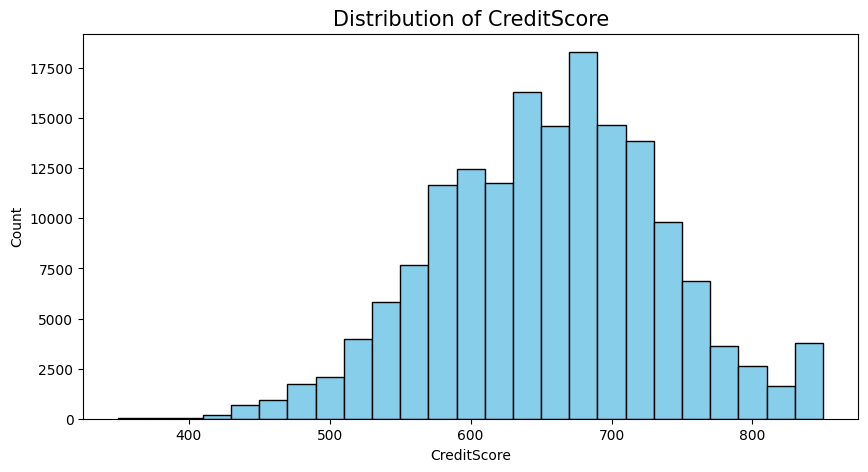

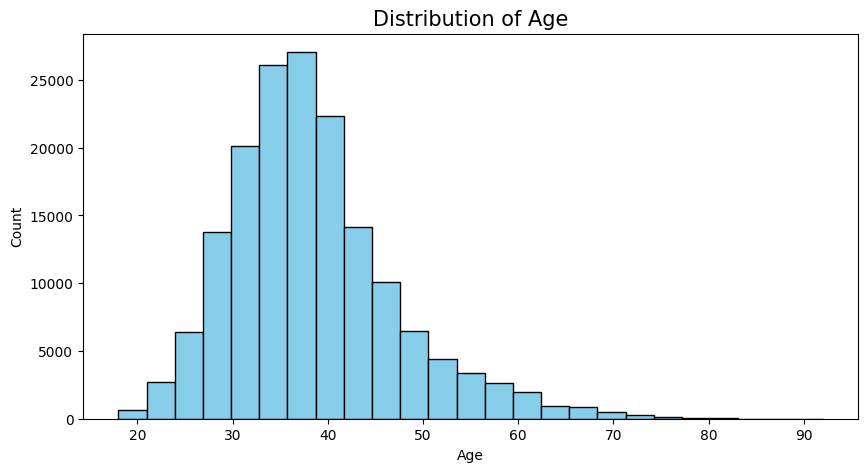

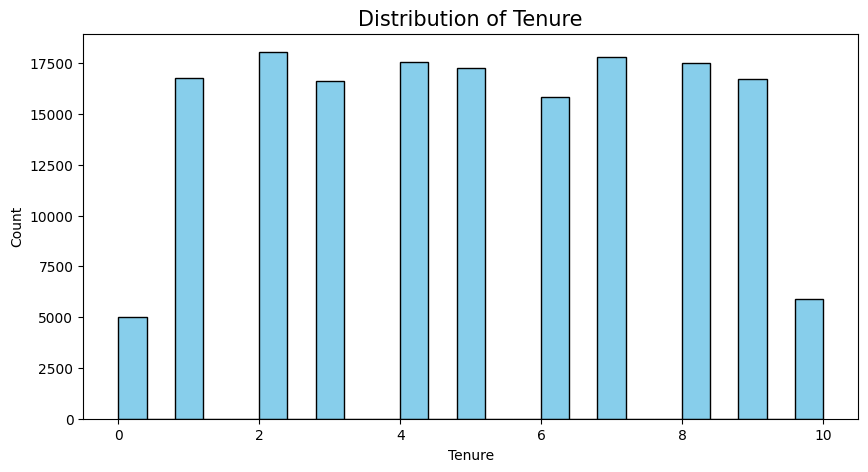

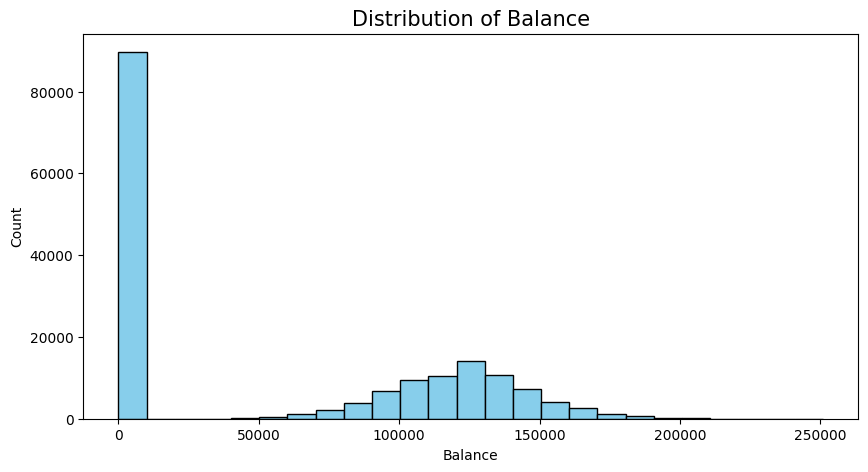

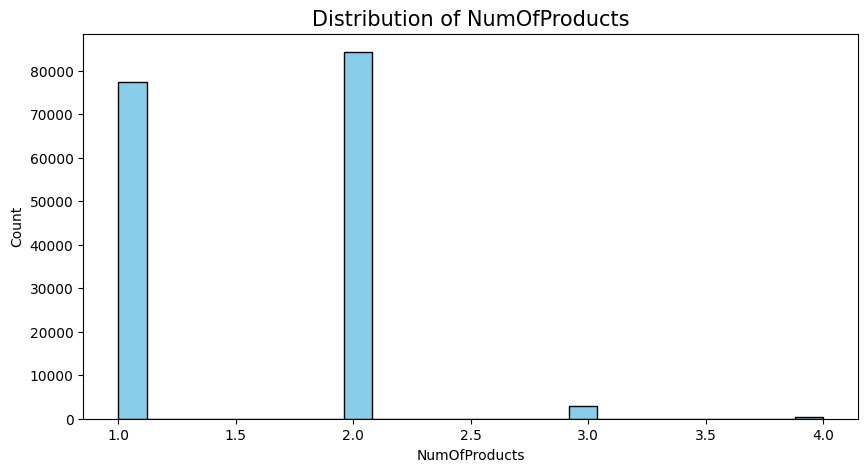

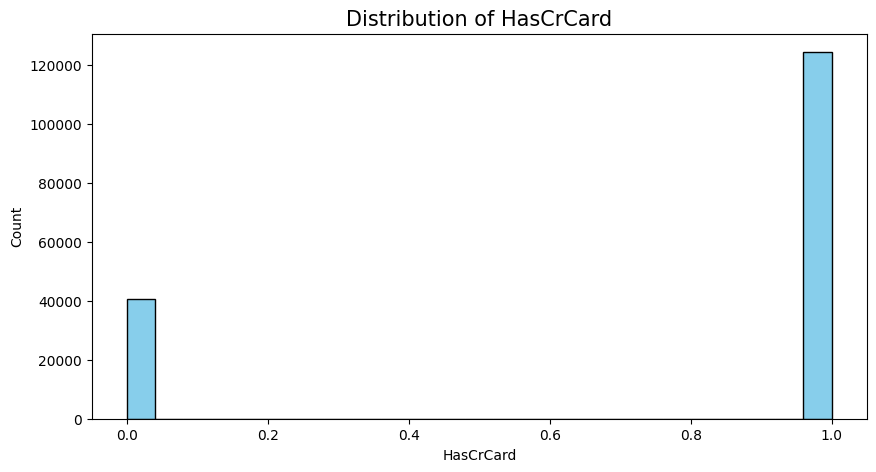

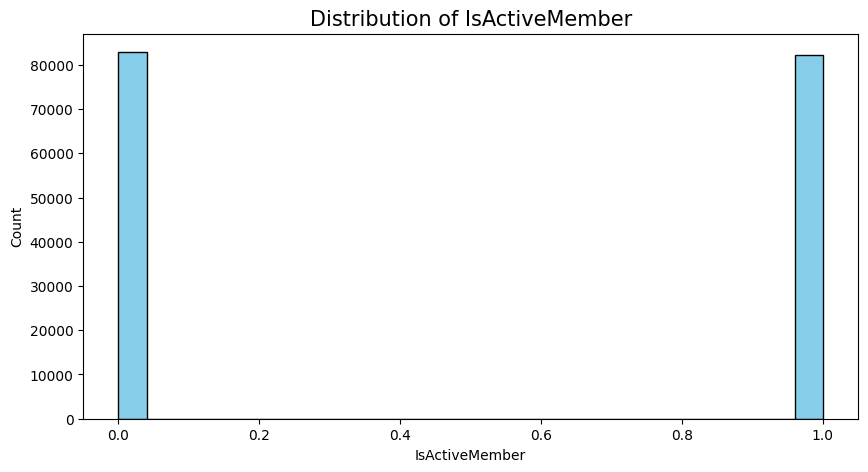

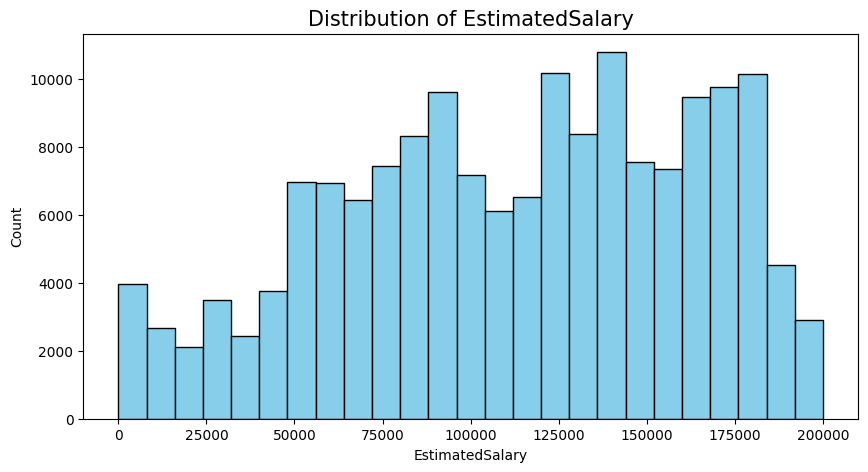

In [14]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(train_data[col], bins = 25, color = 'skyblue', edgecolor = 'black')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}', fontsize = 15)
    plt.show()

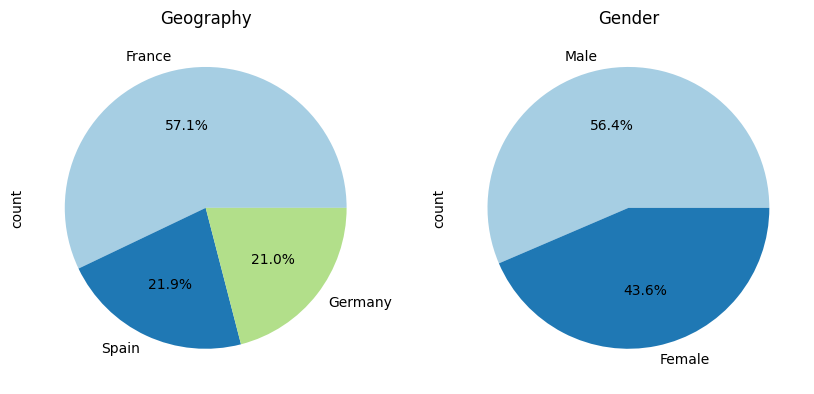

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].set_title('Geography')
train_data['Geography'].value_counts().plot(kind = 'pie', 
                                            autopct = '%1.1f%%', 
                                            ax = ax[0],
                                            colors = theme_color)

ax[1].set_title('Gender')
train_data['Gender'].value_counts().plot(kind = 'pie', 
                                         autopct = '%1.1f%%', 
                                         ax = ax[1],
                                         colors = theme_color)


plt.show()

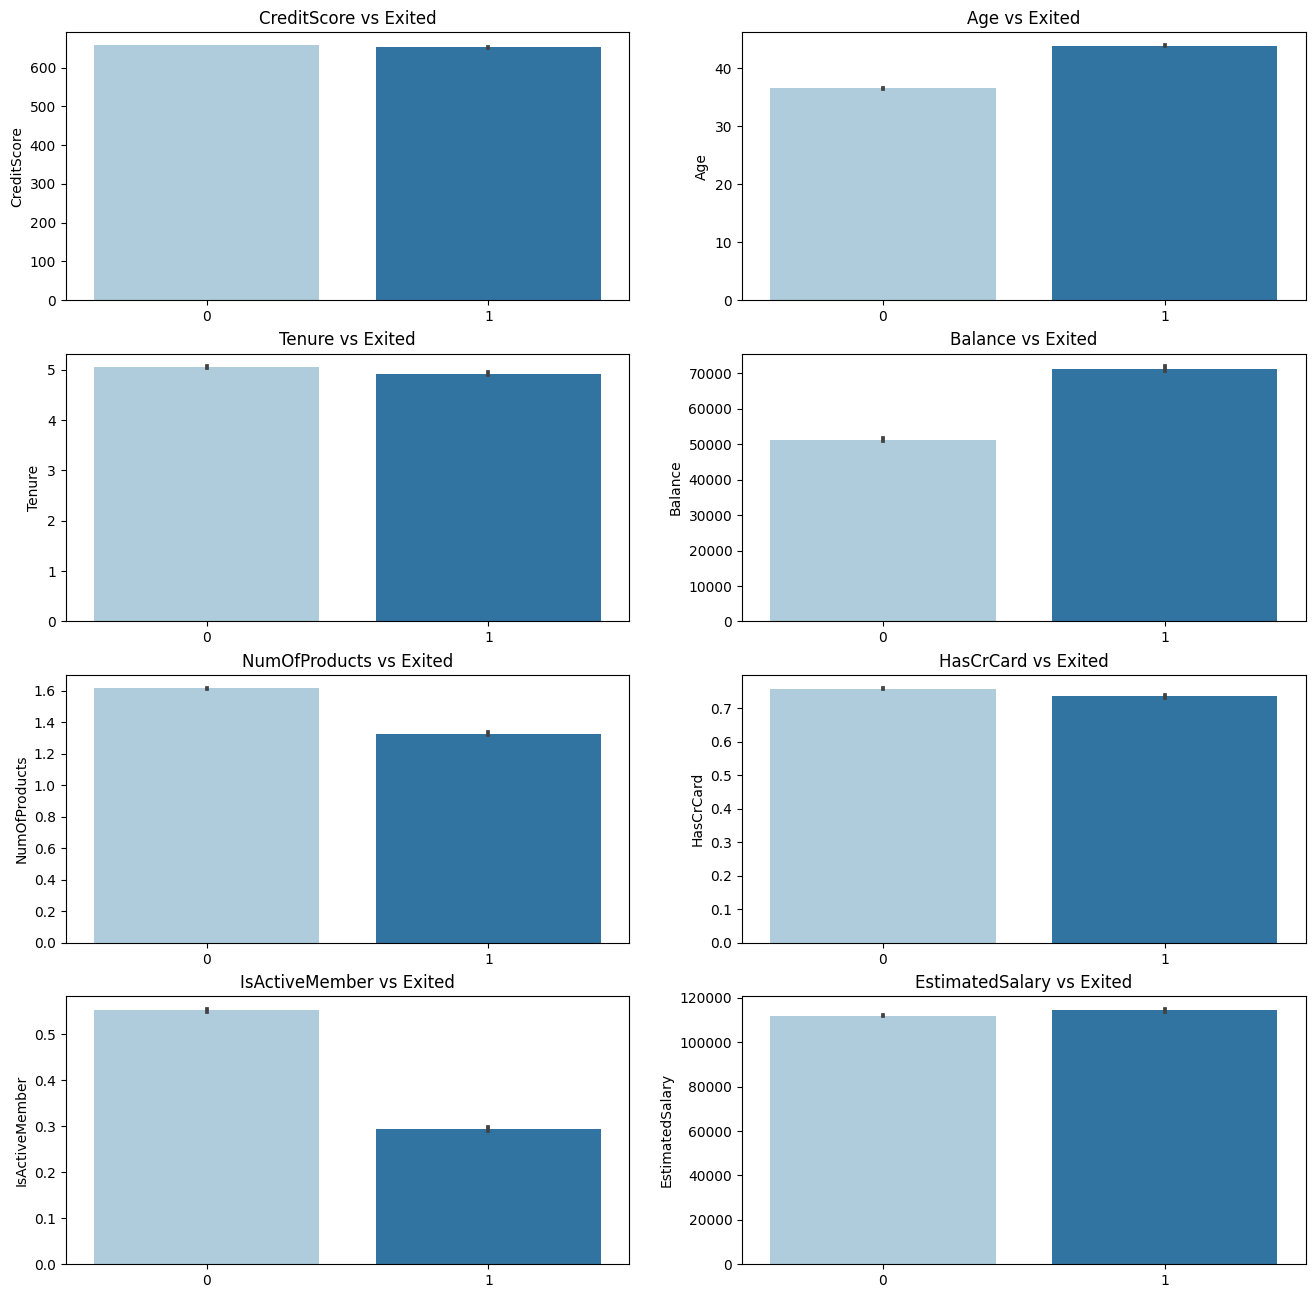

In [16]:
plt.figure(figsize = (16, 16))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.barplot(x = 'Exited', y = col, data = train_data, palette = 'Paired')
    plt.title(f'{col} vs Exited')
    plt.xlabel('')
    plt.ylabel(col)
plt.show()

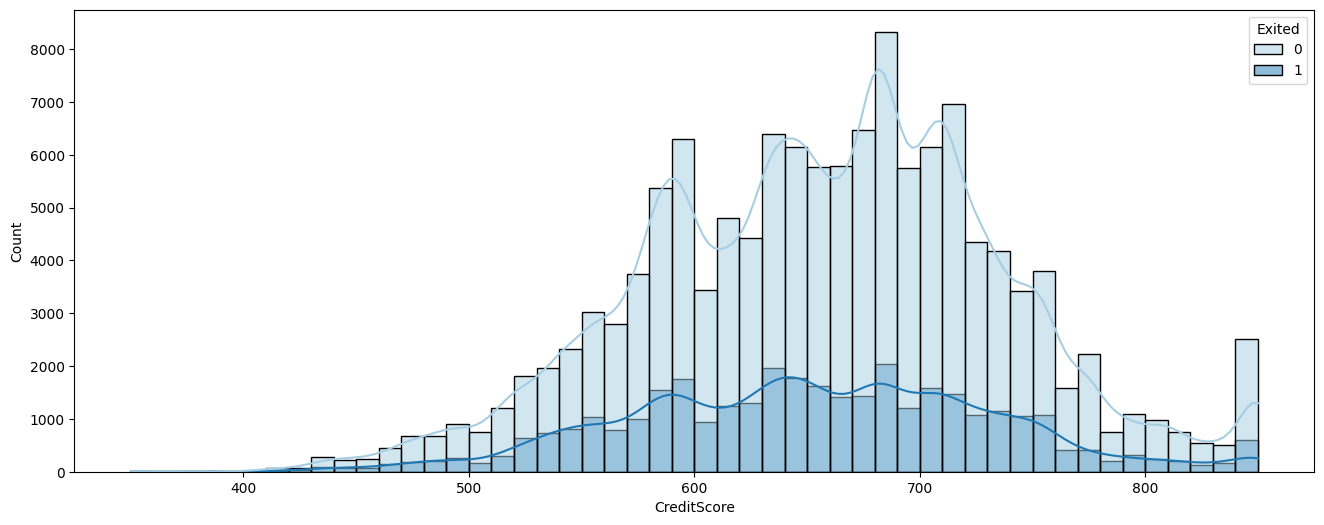

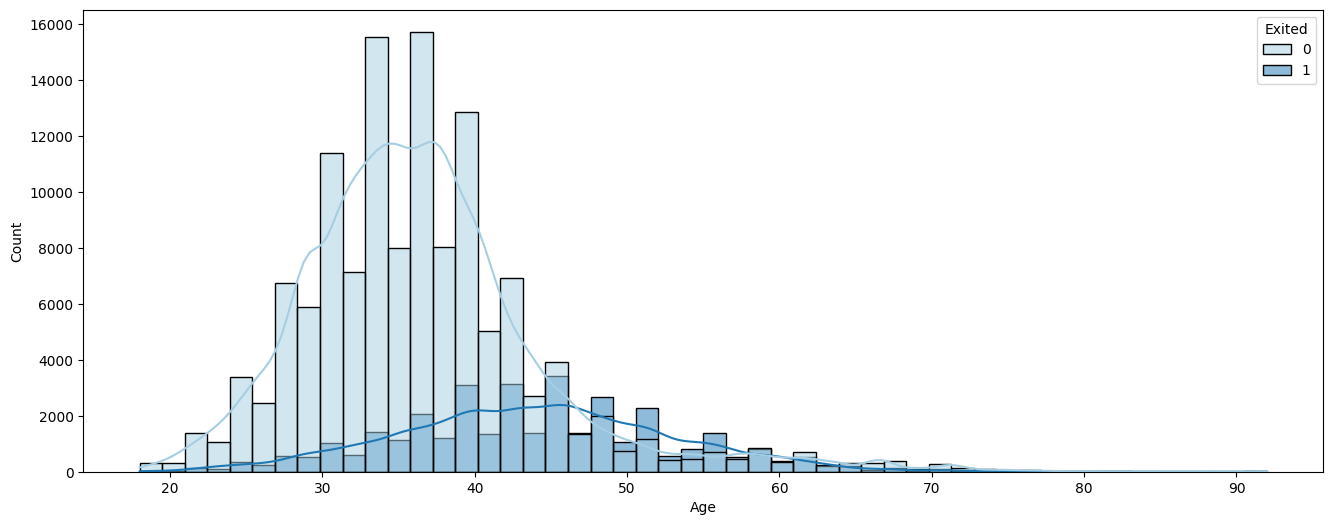

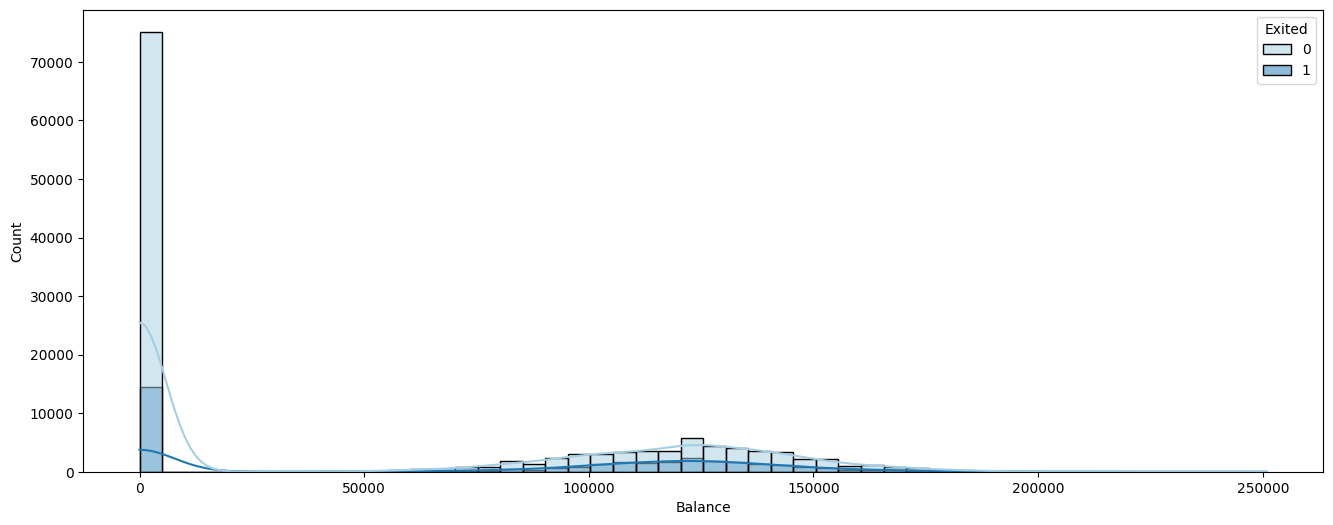

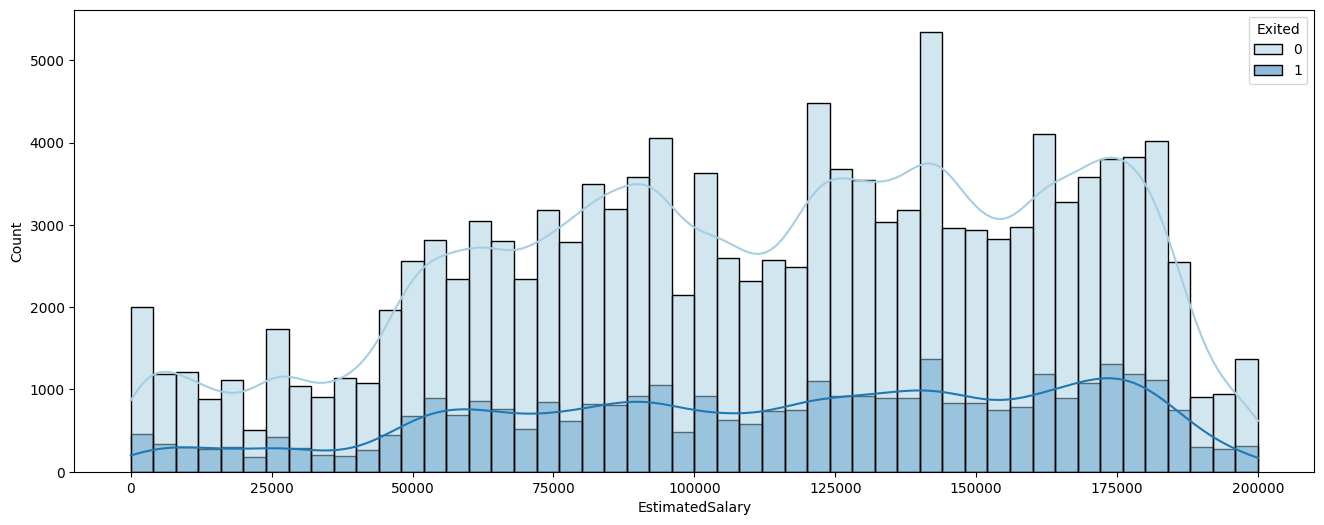

In [17]:
numerical_cols = numerical_columns.copy()

numerical_cols.remove('IsActiveMember')
numerical_cols.remove('Tenure')
numerical_cols.remove('NumOfProducts')
numerical_cols.remove('HasCrCard') 


for column in numerical_cols:
    fig, ax = plt.subplots(figsize = (16, 6))
    fig = sns.histplot(train_data, x = column, hue = "Exited", bins = 50, kde = True, palette = theme_color)
    plt.show()

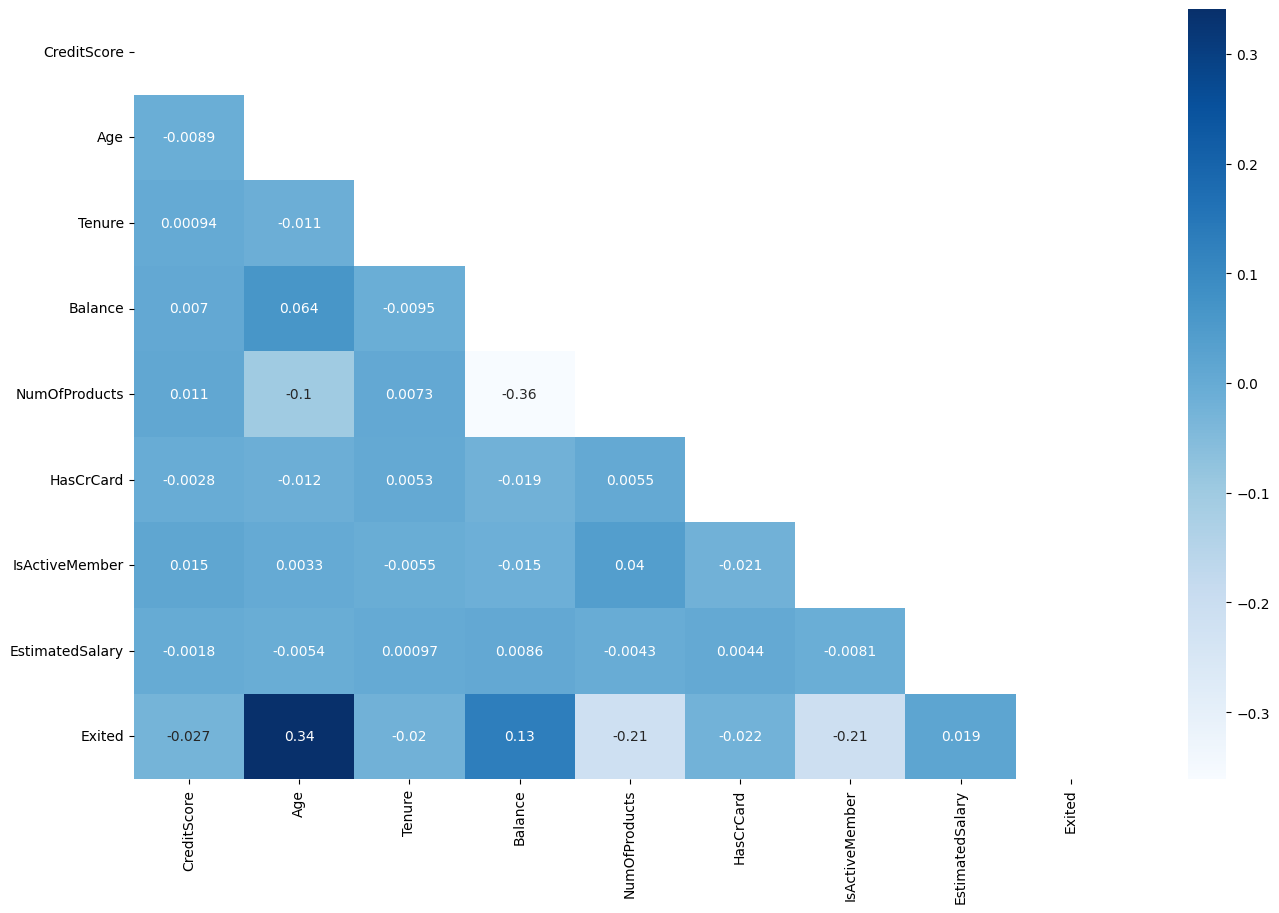

In [18]:
numerical_columns.append('Exited')
correlation_matrix = train_data[numerical_columns].corr()

mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, mask = mask, annot = True, cmap = 'Blues')
plt.show()

### Exploratory Data Analysis (EDA) Summary

#### Key Observations:
1. **Target (`Exited`):**
   - The dataset is moderately imbalanced.
   - A higher percentage of customers did not churn (`Exited = 0`) compared to those who churned (`Exited = 1`).
   - This imbalance may require techniques like resampling or adjusting class weights in the model.

2. **Feature Relationships:**
   - **Geography:** The majority of customers are from **France**, followed by **Germany** and **Spain**. This distribution should be encoded for use in the model.
   - **Gender:** The dataset contains more **Males** compared to **Females**.
   - **Age:** A higher churn rate is observed in older customers. Age might be a strong predictor for churn.
   - **Balance:** Customers with zero balance appear less likely to churn. This feature could be significant.
   - **NumOfProducts:** Customers with 1 or 2 products are more common.

3. **Correlations:**
   - `Age` and `Balance` show some correlation with the target.

4. **Categorical Variables:**
   - The features `Geography` and `Gender` need to be encoded for modeling.

5. **Numerical Features:**
   - Most numerical features are evenly distributed, with no significant outliers detected.
   - `Tenure` ranges from 0 to 10, with a near-uniform distribution.
   - Scaling may not be necessary unless specific algorithms require it (e.g. `Knn`).

6. **Class Imbalance:**
   - The slight imbalance in the target variable could affect model performance if not addressed.

<br>

# 4. Data Preprocessing


### 4.1 Duplicated data
- There are **123** duplicated rows

In [19]:
train_data.drop_duplicates(inplace = True, keep = 'first')

train_data.shape

(164911, 11)

### 4.2 Categorical Columns:
- The features `Geography` and `Gender` need to be encoded.
- There are multiple encoders available (e.g. `One-Hot Encoder`, `Label Encoder`).

In [20]:
print(train_data['Geography'].unique())
print(train_data['Gender'].unique())

['France' 'Spain' 'Germany']
['Male' 'Female']


In [21]:
train_data = train_data.replace({
    'Geography': {'France': 1, 'Spain': 2, 'Germany': 3},
    'Gender'   : {'Male' : 0, 'Female' : 1},  
})

In [22]:
test_data = test_data.replace({
    'Geography': {'France': 1, 'Spain': 2, 'Germany': 3},
    'Gender'   : {'Male' : 0, 'Female' : 1},  
})

In [23]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,1,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,1,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,1,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,1,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,0,33.0,5,0.00,2,1.0,1.0,15068.83,0


---

In [24]:
numerical_columns.remove('Exited')

for column in numerical_columns:
    print(column, max(train_data[column]), min(train_data[column]))

CreditScore 850 350
Age 92.0 18.0
Tenure 10 0
Balance 250898.09 0.0
NumOfProducts 4 1
HasCrCard 1.0 0.0
IsActiveMember 1.0 0.0
EstimatedSalary 199992.48 11.58


---

# 5. Model Selection and Training


### 5.1 Data Splitting

In [25]:
input_data  = train_data.drop(['Exited'], axis = 1)
output_data = train_data['Exited']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 42)

### 5.2 Data Scaling

In [27]:
scaler = StandardScaler()

input_data['Balance'] = scaler.fit_transform(input_data[['Balance']])

input_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,1,0,33.0,3,-0.883190,2,1.0,0.0,181449.97
1,627,1,0,33.0,1,-0.883190,2,1.0,1.0,49503.50
2,678,1,0,40.0,10,-0.883190,2,1.0,0.0,184866.69
3,581,1,0,34.0,2,1.486833,1,1.0,1.0,84560.88
4,716,2,0,33.0,5,-0.883190,2,1.0,1.0,15068.83


### 5.3 Modeling and Training

In [28]:
models = {
    'Logistic Regression': LogisticRegression(random_state = 42, max_iter = 1000),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors = 9),
    'XGBoost': XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
}

In [29]:
idx = 1
for name, model in models.items():
    model.fit(input_data, output_data)
    print(f"Model {idx}: {name}")
    idx += 1
    model.fit(x_train, y_train)
    print(f'  - {name} Training done ✅ \n')
    

Model 1: Logistic Regression
  - Logistic Regression Training done ✅ 

Model 2: Random Forest
  - Random Forest Training done ✅ 

Model 3: K Nearest Neighbors
  - K Nearest Neighbors Training done ✅ 

Model 4: XGBoost
  - XGBoost Training done ✅ 



### 5.3 Evaluation

In [30]:
idx = 1
y_preds = []
for name, model in models.items():
    print(f"Model {idx}: {name}")
    idx += 1
    y_pred = model.predict(x_test)
    y_preds.append(y_pred)
    print(classification_report(y_test, y_pred), '\n\n')

Model 1: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     25943
           1       0.49      0.12      0.19      7040

    accuracy                           0.79     32983
   macro avg       0.64      0.54      0.53     32983
weighted avg       0.73      0.79      0.73     32983
 


Model 2: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     25943
           1       0.73      0.54      0.62      7040

    accuracy                           0.86     32983
   macro avg       0.81      0.74      0.77     32983
weighted avg       0.85      0.86      0.85     32983
 


Model 3: K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     25943
           1       0.31      0.06      0.10      7040

    accuracy                           0.77     32983
   macro avg       0.55      0.51      0.

# 6. Cross Validation and Hyperparameter Tuning


### 6.1 For Random Forest

In [31]:
models['Random Forest'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
param_rf_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), 
                           param_rf_grid,
                           cv = 3,
                           n_jobs = -1
                          )
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [33]:
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best AUC Score: {best_auc}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
Best AUC Score: 0.8615608513734765


In [34]:
best_rf_model = RandomForestClassifier(**best_params, random_state = 42)
best_rf_model.fit(x_train, y_train)

rf_y_pred = best_rf_model.predict(x_test)

### 6.2 For XGBoost

In [35]:
models['XGBoost'].get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

In [36]:
param_xgb_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder = False, 
                                         eval_metric = 'logloss', 
                                         random_state = 42), 
                           param_xgb_grid, 
                           cv = 3, 
                           n_jobs = -1
                          )
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]})

In [37]:
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best AUC Score: {best_auc}')

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best AUC Score: 0.8652143593475229


In [38]:
best_xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', **best_params, random_state = 42)
best_xgb_model.fit(x_train, y_train)

xgb_y_pred = best_xgb_model.predict(x_test)

# 7. Evaluation

In [39]:
best_rf_auc = accuracy_score(y_test, rf_y_pred)
print(f'Best Random Forest AUC : {best_rf_auc * 100:.2f}%')

print('----------------------------------------')

best_xgb_auc = accuracy_score(y_test, xgb_y_pred)
print(f'Best XGBoost AUC : {best_xgb_auc * 100:.2f}%')

Best Random Forest AUC : 86.03%
----------------------------------------
Best XGBoost AUC : 86.53%


In [40]:
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     25943
           1       0.75      0.55      0.63      7040

    accuracy                           0.87     32983
   macro avg       0.82      0.75      0.78     32983
weighted avg       0.86      0.87      0.86     32983



Text(50.722222222222214, 0.5, 'Actual')

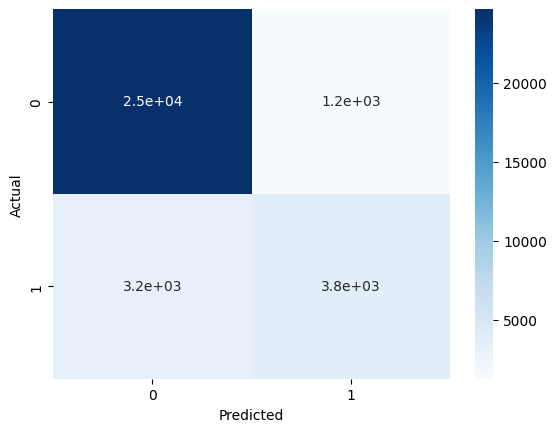

In [41]:
cm = confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 8. Submission
## XGBoost Model

In [42]:
sample_submission = sample_submission.drop(['Exited'], axis=1)
submission_exited = best_xgb_model.predict_proba(test_data)[:, 1]
sample_submission['Exited'] = submission_exited

sample_submission.head(10)

,id,Exited
0,165034,0.024444
1,165035,0.801891
2,165036,0.028071
3,165037,0.247561
4,165038,0.353325
5,165039,0.058350
6,165040,0.038406
7,165041,0.098925
8,165042,0.591646
9,165043,0.012527


In [43]:
sample_submission['Exited'] = (sample_submission['Exited'] > 0.5).astype(int)

In [44]:
sample_submission.to_csv('submission.csv', index=False)

# Model Deployment

In [45]:
import joblib
joblib.dump(best_xgb_model, 'best_model.pkl')

model = joblib.load('best_model.pkl')